### Objective
* Demonstrate how kNN model is applied to predict hourly traffic volume
* Evaluate the accuracy of the model

### Workflow
1. import the traffic data
2. create extra explanatory variables
3. create the train-split and computing the R2
4. generate a plot of the test set to show the predictive performance
5. add grid search to find a different number of neighbors for better performance
6. add random search to compare the result with the grid search approach

[Traffic Volume](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)

In [1]:
# step-1 => import the traffic data

import pandas as pd
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
# step-2 => create the additional seasonality variables

data['year'] = data['date_time'].apply(lambda x: x[:4])
data['month'] = data['date_time'].apply(lambda x: x[5:7])
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)

In [3]:
# step-3 => create the train-test split and calculating the R2 of the default model 

# Create objects X and y
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)

from sklearn.neighbors import KNeighborsRegressor
my_dt = KNeighborsRegressor()
my_dt.fit(X_train, y_train)

fcst = my_dt.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(list(y_test), list(fcst)))

0.9706400665335333


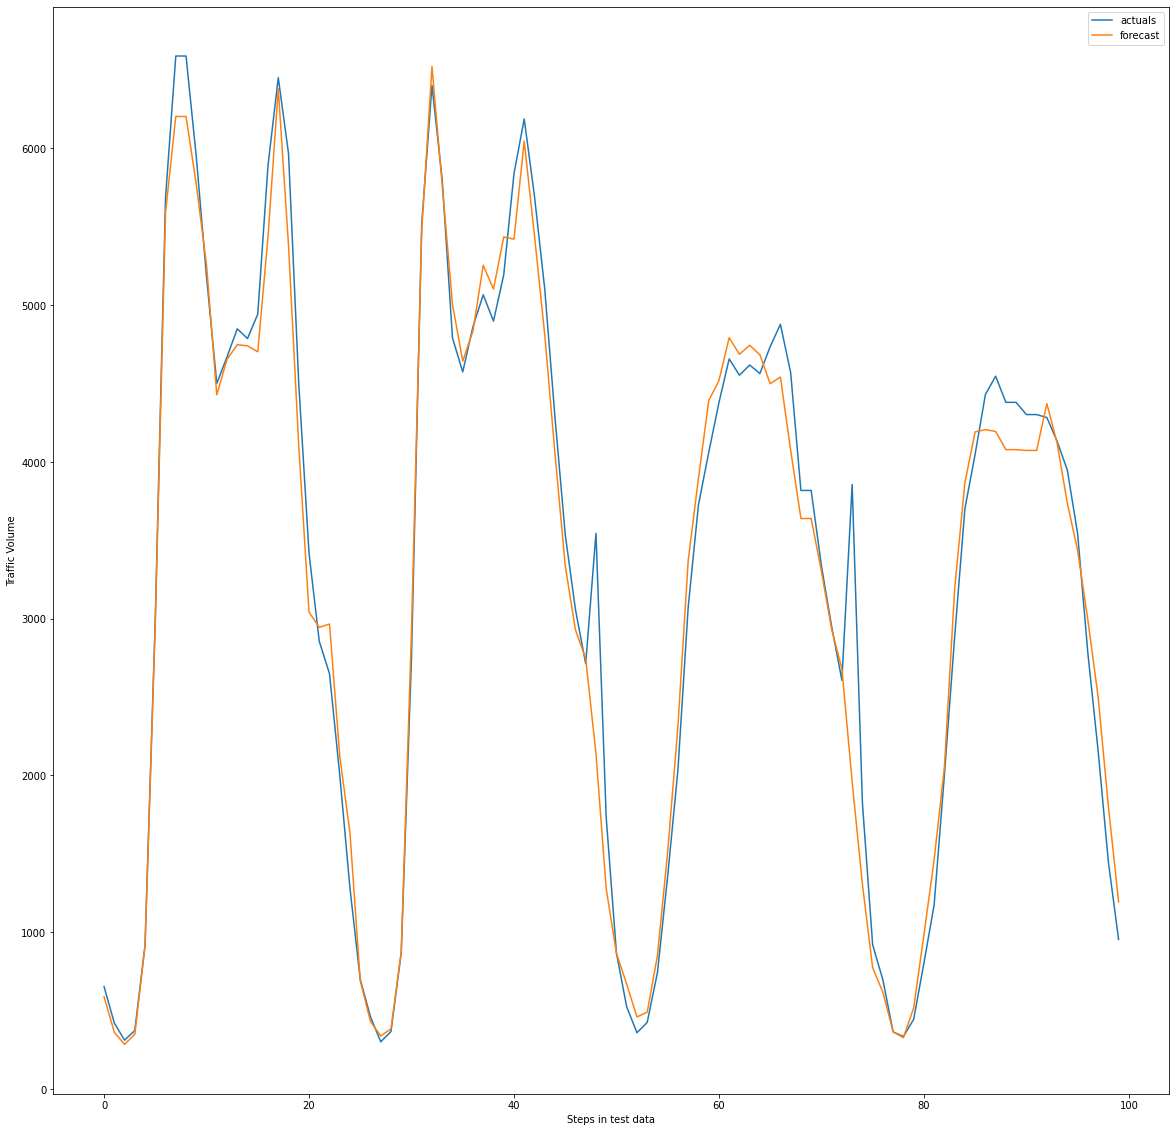

In [4]:
# step-4 => generate the plot to show the predictive performance of the test set

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(list(y_test))
plt.plot(list(fcst))
plt.legend(['actuals', 'forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()

In [5]:
# step-5 => add a grid search to test the number of neighbors by increments of 2

from sklearn.model_selection import GridSearchCV

my_knn = GridSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':[2, 4, 6, 8, 10, 12]},
                scoring = 'r2', n_jobs = -1)

my_knn.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_knn.predict(X_test))))
print(my_knn.best_estimator_)

0.9724742461838174
KNeighborsRegressor(n_neighbors=8)


In [6]:
# step-6 => replace a grid search by a random search to cross-validate the kNN model

from sklearn.model_selection import RandomizedSearchCV

my_knn = RandomizedSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':list(range(1, 20))},
                scoring = 'r2', n_iter=6, n_jobs = -1)

my_knn.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_knn.predict(X_test))))
print(my_knn.best_estimator_)

0.9736775938023586
KNeighborsRegressor(n_neighbors=7)
